In [1]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import pandas as pd
import time
from urllib.parse import quote

In [2]:
chromedriver = 'C:/Workspace/02.DataAnalysis/05.Crawling/chromedriver.exe'
driver =webdriver.Chrome(chromedriver)

In [3]:
base_url  = 'https://search.naver.com/search.naver?where=view&sm=tab_jum&query='
url = base_url + quote('갤럭시 워치4')
driver.get(url)

In [4]:
from selenium.webdriver.common.keys import Keys

In [5]:
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [7]:
lis = soup.select('li.bx._svp_item')

In [8]:
len(lis)

95

In [9]:
title_list, content_list, date_list =[],[],[]
for i, li in enumerate(lis):
    try:
        adv = li.select_one('a.link_ad').get_text()
        if adv.strip() == '광고':
            continue
    except:
        title = li.select_one('a.api_txt_lines.total_tit._cross_trigger').get_text()
        content = li.select_one('div.api_txt_lines.dsc_txt').get_text()
        date = li.select_one('.sub_time.sub_txt').get_text()
        title_list.append(title)
        content_list.append(content)
        date_list.append(date)

In [10]:
df = pd.DataFrame({'title': title_list, 'content': content_list, 'date':date_list})
df.head()

,title,content,date
0,삼성 갤럭시 워치4 블랙 40mm 3일 사용 후기,갤럭시 웨어러블 앱에서 갤럭시 워치4가 정상적으로 인식하는 것을 확인할 수 있습니다...,3일 전
1,갤럭시 워치4 사전예약 출시일 할인하네영,갤럭시 워치4 사전예약 출시일 할인하네영 이야기를 해드리니 관심을 갖고 찾아보고 있...,5일 전
2,갤럭시 z플립3 & 워치4에 대한 쓴소리... 발열... 열받네.,겸사겸사 구입한 갤럭시 z플립3 와 워치4 클래식을 이틀째 사용하면서 장단점을 파악...,어제
3,갤럭시워치4 블랙 44mm 개봉기 및 첫인상,"기존에는 스테인리스 재질과 클래식한 디자인의 갤럭시워치3, 알루미늄/스테인리스 재질...",2021.08.19.
4,갤럭시 워치4 삼케플 vs 필름or강화유리,사용기종 : 갤럭시 워치4 44mm 질문내용 : (구체적으로): 이번에 첫 스마트워...,2021.08.19.


In [12]:
df.to_csv('blogGalaxywatch4.csv',index=False)

In [13]:
driver.close()

In [17]:
from wordcloud import wordcloud
from PIL import Image

In [15]:
import numpy as np

In [16]:
import matplotlib.pyplot as plt 

In [18]:
df = pd.read_csv('blogGalaxywatch4.csv')

In [20]:
df[['title','content']].head()

,title,content
0,삼성 갤럭시 워치4 블랙 40mm 3일 사용 후기,갤럭시 웨어러블 앱에서 갤럭시 워치4가 정상적으로 인식하는 것을 확인할 수 있습니다...
1,갤럭시 워치4 사전예약 출시일 할인하네영,갤럭시 워치4 사전예약 출시일 할인하네영 이야기를 해드리니 관심을 갖고 찾아보고 있...
2,갤럭시 z플립3 & 워치4에 대한 쓴소리... 발열... 열받네.,겸사겸사 구입한 갤럭시 z플립3 와 워치4 클래식을 이틀째 사용하면서 장단점을 파악...
3,갤럭시워치4 블랙 44mm 개봉기 및 첫인상,"기존에는 스테인리스 재질과 클래식한 디자인의 갤럭시워치3, 알루미늄/스테인리스 재질..."
4,갤럭시 워치4 삼케플 vs 필름or강화유리,사용기종 : 갤럭시 워치4 44mm 질문내용 : (구체적으로): 이번에 첫 스마트워...


In [ ]:
data = ''.join(df['content']+df['title'])
data

In [53]:
path = 'C:/Windows/Fonts/malgun.ttf'
stop_text = """
    있습니다 있다 있는 하는 것이다 했다 대해 위해 이 했습니다 때문에 잘 구입한 제가
    또한 바로 것이라 및 것과 가장 더 것 조금 이번 수 지금 이번에 저는 이렇게 기존 위치를 워치를
"""
stopwords = stop_text.split()
data = ''.join(df['content']+df['title'])
mask = np.array(Image.open('clock.png'))
wc =wordcloud.WordCloud(background_color='white', mask=mask,font_path=path, 
    stopwords=stopwords).generate(data)

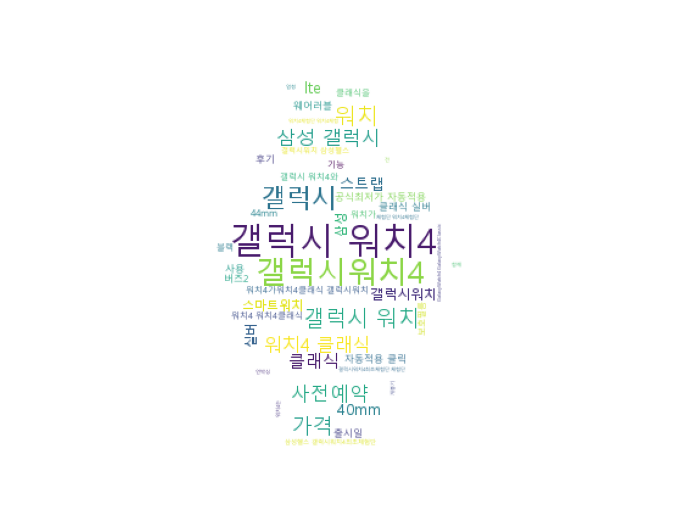

In [54]:
plt.figure(figsize=(12,12))
plt.imshow(wc)
plt.axis('off')
plt.show()